# 🧮 Product Rule in Action: Revenue Optimization

## 📚 Concept

In business and economics, **total revenue** is often calculated as:



$$
R(x) = p(x) * x
$$

$$
Profit:
P(x)=R(x)−C(x)
$$


Where:
- `x` = number of units sold
- `p(x)` = price per unit, which may decrease as more units are sold (due to discounts or demand elasticity)
- Cost: `C(x)`, which includes fixed and variable components

The **product rule** is essential here because both price and quantity are changing with respect to `x`.

---

## 🏦 Scenario: Dynamic Pricing Strategy

You run a niche e-commerce store selling enchanted swords. Demand is strong, but price sensitivity kicks in quickly — more sales require steeper discounts. You also have fixed costs (marketing, platform fees) and a variable cost per unit (materials, labor, etc.).

## 📊 Assumptions:
- Price drops exponentially with each additional unit sold:

$$
p(x) = 100 \cdot e^{- 0.01 \dot x}
$$

- `Fixed costs: $1000 (e.g. platform, advertising)`
- `Variable cost: $25 per sword`
- `Total cost function:`



$$
C(x) = 1000 + 25 \cdot x
$$
- Revenue:
$$
R(x) = x \cdot p(x) = x \cdot 100 \cdot e^{−0.01 \cdot x}
$$
- Profit:
$$
P(x) = R(x) - C(x)
$$


You are tasked with finding:
1. Calculate and visualize:
    - Revenue function `R(x)`
    - Profit function `P(x)`
    - Marginal revenue `R′(x)`
    - Marginal profit `P'(x)`
2. Find the unit quantity `x` that maximizes profit
3. Plot and analyze real-world feasibility

---

## ✏️ Math Setup

Using the **product rule**:

If `R(x) = f(x) * g(x)`, then:



$$
R'(x) = f'(x) * g(x) + f(x) * g'(x)
$$

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound

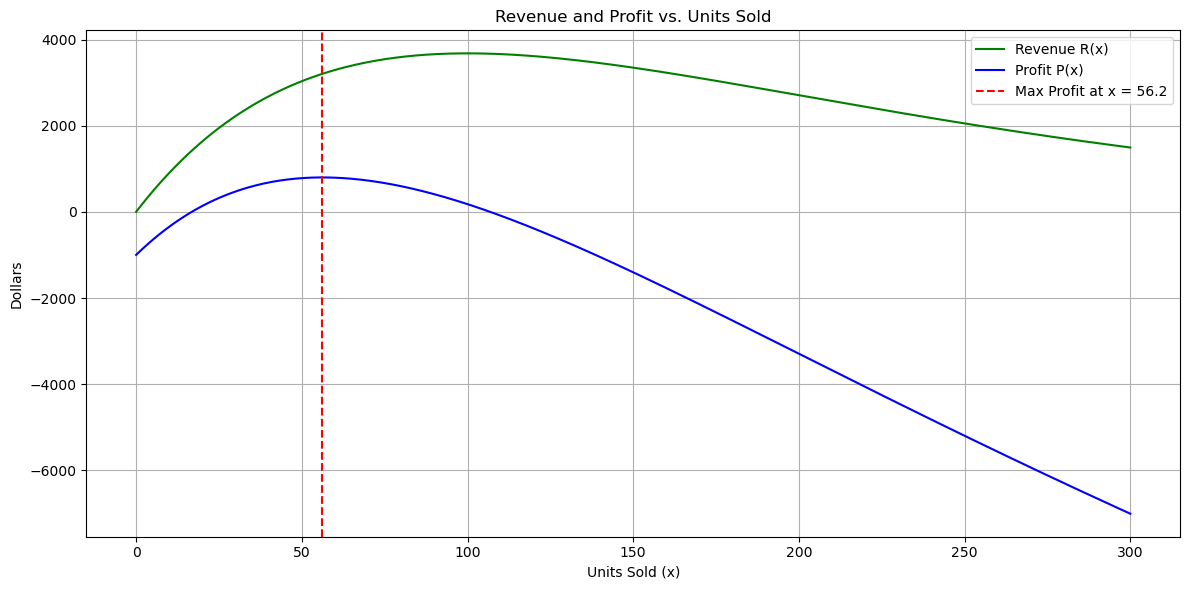

In [2]:
# Symbolic variable
x = sp.Symbol('x')

# Price function (nonlinear demand)
p = 100 * sp.exp(-0.01 * x)

# Revenue and cost functions
R = x * p
C = 1000 + 25 * x
P = R - C

# Derivatives
R_prime = sp.diff(R, x)
P_prime = sp.diff(P, x)

# Convert to numerical functions
R_func = sp.lambdify(x, R, 'numpy')
C_func = sp.lambdify(x, C, 'numpy')
P_func = sp.lambdify(x, P, 'numpy')
R_prime_func = sp.lambdify(x, R_prime, 'numpy')
P_prime_func = sp.lambdify(x, P_prime, 'numpy')

# Evaluate
x_vals = np.linspace(0, 300, 500)
R_vals = R_func(x_vals)
P_vals = P_func(x_vals)
R_prime_vals = R_prime_func(x_vals)
P_prime_vals = P_prime_func(x_vals)

# Find x that maximizes profit
opt_x = fminbound(lambda x: -P_func(x), 0, 300)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x_vals, R_vals, label="Revenue R(x)", color='green')
plt.plot(x_vals, P_vals, label="Profit P(x)", color='blue')
plt.axvline(opt_x, color='red', linestyle='--', label=f'Max Profit at x = {opt_x:.1f}')
plt.title("Revenue and Profit vs. Units Sold")
plt.xlabel("Units Sold (x)")
plt.ylabel("Dollars")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
